# Visual Analysis of Billionaire Horoscope

### – Take Forbes Billionaire List Top 300 as an example

## Introduction

Wealth is a popular topic all the time. Ordinary people want to acquire a great amount of wealth, but successful people are few. The accumulation of wealth requires many factors such as efforts, wisdom, opportunities... However, success can hardly be duplicated. Even if you have the same efforts, wisdom, opportunities with Bill Gates, it does not mean that you can achieve success like his. As Warren Buffett said before, “I succeeded only because I was a lucky sperm”. Wealth is closely associated with luck. Therefore, something superstitious could be artificially connected with wealth, like Chinese zodiac and constellation.

**However, different “experts” have different opinions of constellations’ luck in making money.** For example, a website about analyzing fortune says that Sagittarius has best luck in making money in 2018, but another similar website regards Cancer as the most lucky one in this year. Therefore, the problem comes. ***Is there a certain relationship between constellation and wealth?***  **We try to find the answer by acquiring and analyzing the data of top 300 billionaires on Forbes list.**

**We are not the first one curious about this question.** For instance, the Times published the constellation of multimillionaires in Britain in April 1999. Of the more than 1,000 names on the list, Gemini and Taurus were known to make the most money. Besides, a KOL in P2P field, “ijrjia” said that Scorpio had the best wealth fortune by collecting data of Chinese billionaires. As there is no acknowledged conclusion, we would like to make a research on the basis of Forbes list.

To be more specific, this research try to find the answer by acquiring and analyzing the data of top 300 billionaires on Forbes list. It includes three questions: 
1. Which horoscope has the most number of billionaires? 
2. Which horoscope is expected to have more wealth? 
3. What is the relationship between the type of horoscope and the ranking of billionaires? 

Generally speaking, the **method** of our research was data collection population targeted for TOP300 billionaires on Forbes World's Billionaires 2018.

- On the aspect of variables, the independent variables were the constellation and type of billionaires and the dependent variables are wealth value and billionaires‘ rank.
- On the aspect of data source, we chose Forbes China website to collect billionaires’ names and wealth volume, and we also used Wikipedia to search their birthday in order to find out their constellation. The reason why we chose Wikipedia was because it is well formed and sorted, and also had better data integrity than Baidu Baike and MBALIB.

In the procedure of data collection, we had two steps.

- Firstly, we scraped data on Forbes China website by BeautifulSoup and store them into pandas. The data was presented in tabular form, and we acquire dour dependent variables including name, wealth rank, and wealth value.
- Secondly, we got the birth information on Wikipedia.

## Data acquisition process

We scraped data on Forbes China website by BeautifulSoup and store them into pandas. The data was presented in tabular form, and we acquire four dependent variables including name, wealth rank, and wealth value.

In [ ]:
#獲取Forbes前三百中英名單及財富值

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url='http://www.forbeschina.com/review/list/002436.shtml'
re = requests.get(url)
re.encoding = 'utf-8'
soup = BeautifulSoup(re.text,'html.parser')
right_table=soup.find('table', id='show_list')

In [4]:
thead= [header.text for header in right_table.find_all('td')]
headers=(thead[0:5])
print(headers)

['排名', '姓名（中文）', '姓名（英文）', '财富值（亿美元）', '财富来源']


In [6]:
rows = []
for row in right_table.find_all('tr'):
    rows.append([val.text for val in row.find_all('td')])
for n,r in enumerate(rows):
    print(n,r)
if n > 300: break

0 ['1', '杰夫·贝索斯', 'Jeff Bezos', '1120', '亚马逊']
1 ['2', '比尔·盖茨', 'Bill Gates', '900', '微软']
2 ['3', '沃伦·巴菲特', 'Warren Buffett', '840', '伯克希尔哈撒韦']
3 ['4', '伯纳德·阿诺特及家族', 'Bernard Arnault & family', '720', '路威酩轩']
4 ['5', '马克·扎克伯格', 'Mark Zuckerberg', '710', 'Facebook']
5 ['6', '阿曼西奥·奥特加', 'Amancio Ortega', '700', 'Zara']
6 ['7', '卡洛斯·斯利姆·埃卢及家族', 'Carlos Slim Helu & family', '671', '电信']
7 ['8', '查尔斯·科赫', 'Charles Koch', '600', '科氏工业']
8 ['8', '大卫·科赫', 'David Koch', '600', '科氏工业']
9 ['10', '拉里·埃里森', 'Larry Ellison', '585', '软件']
10 ['11', '迈克尔·布隆伯格', 'Michael Bloomberg', '500', '彭博']
11 ['12', '拉里·佩奇', 'Larry Page', '488', '谷歌']
12 ['13', '谢尔盖·布林', 'Sergey Brin', '475', '谷歌']
13 ['14', '吉姆·沃尔顿', 'Jim Walton', '464', '沃尔玛']
14 ['15', 'S.罗伯森·沃尔顿', 'S. Robson Walton', '462', '沃尔玛']
15 ['16', '艾丽斯·沃尔顿', 'Alice Walton', '460', '沃尔玛']
16 ['17', '马化腾', 'Ma Huateng', '453', '网络媒体']
17 ['18', '弗朗索瓦丝·贝当古·迈耶斯及家族', 'Francoise Bettencourt Meyers & family', '422', '欧莱雅']
18 ['19', '穆克什·安巴尼', 'Mukesh Amb

978 ['965', '卢卡·加拉沃格利亚', 'Luca Garavoglia', '25', '烈酒']
979 ['965', '诺姆·戈特斯曼', 'Noam Gottesman', '25', '对冲基金']
980 ['965', '乔纳森·格雷', 'Jonathan Gray', '25', '投资']
981 ['965', '斯泰因·埃里克·哈根', 'Stein Erik Hagen', '25', '消费品']
982 ['965', '韩昌祐及家族', 'Han Chang-Woo & family', '25', '柏青哥机店']
983 ['965', '约翰·亨利', 'John Henry', '25', '体育']
984 ['965', '何猷龙', 'Lawrence Ho', '25', '赌场']
985 ['965', '许连捷', 'Hui Lin Chit', '25', '卫生用品']
986 ['965', '穆斯塔法·拉赫米·考克', 'Mustafa Rahmi Koc', '25', '多元化经营']
987 ['965', '关锦安', 'Kuan Kam Hon', '25', '合成手套']
988 ['965', '简·劳德', 'Jane Lauder', '25', '化妆品']
989 ['965', '马里查·拉扎里及家族', 'Maritsa Lazari & family', '25', '房地产']
990 ['965', '伯纳德·里维斯及家族', 'Bernard Lewis & family', '25', '零售']
991 ['965', '罗康瑞', 'Vincent Lo', '25', '房地产']
992 ['965', '杰弗里·洛博鲍姆', 'Jeffrey Lorberbaum', '25', '地板']
993 ['965', '乔·曼索托', 'Joe Mansueto', '25', '投资研究']
994 ['965', '何塞·罗伯托·马里尼奥', 'Jose Roberto Marinho', '25', '媒体']
995 ['965', '罗伯托·伊利内乌·马里尼奥', 'Roberto Irineu Marinho', '25', '媒体']

1728 ['1650', '贾斯温德·辛格及家族', 'Jasminder Singh & family', '14', '酒店']
1729 ['1650', '吴笙福', 'Martua Sitorus', '14', '棕榈油']
1730 ['1650', '彼得·斯伯林', 'Peter Sperling', '14', '教育']
1731 ['1650', '泽西·斯塔拉克', 'Jerzy Starak', '14', '医药']
1732 ['1650', '曼尼·斯托尔', 'Manny Stul', '14', '玩具']
1733 ['1650', '苏汝波', 'Su Rubo', '14', '房地产']
1734 ['1650', '福亚特·陶斯雅礼', 'Fuat Tosyali', '14', '钢铁']
1735 ['1650', '肯尼·特罗特', 'Kenny Troutt', '14', '电信']
1736 ['1650', '鲁菲诺·比希尔·冈萨雷斯', 'Rufino Vigil Gonzalez', '14', '钢铁']
1737 ['1650', '王剑峰及家族', 'Wang Jianfeng & family', '14', '汽车零部件']
1738 ['1650', '王靖', 'Wang Jing', '14', '电信服务']
1739 ['1650', '汪群斌', 'Wang Qunbin', '14', '多元化经营']
1740 ['1650', '丹·威尔克斯', 'Dan Wilks', '14', '天然气']
1741 ['1650', '法里斯·威尔克斯', 'Farris Wilks', '14', '天然气']
1742 ['1650', '吴东亮', 'Thomas Wu', '14', '金融']
1743 ['1650', '易峥', 'Yi Zheng', '14', '软件']
1744 ['1650', '袁富根及家族', 'Yuan Fugen & family', '14', '金属']
1745 ['1650', '小理查德·英格灵', 'Richard Yuengling Jr.', '14', '啤酒']
1746 ['1650', '加夫里尔·乌希瓦厄夫

SyntaxError: 'break' outside loop (<ipython-input-6-149b8aba2ae5>, line 6)

In [7]:
dfForbes = pd.DataFrame(rows, columns=headers)
dfForbes
dfForbes.to_csv('pd_namelists.csv')

We got the birth information on Wikipedia.

In [8]:
import requests 
from bs4 import BeautifulSoup
import bs4 as bs
import csv
import pandas as pd

In [9]:
forbes = pd.read_csv('pd_namelists.csv',usecols=[3])
forbeslist = forbes['姓名（英文）'].str.replace(' & family','')

Then we used “https://en.wikipedia.org/wiki/ + name” to get the link for each Wikipedia page.

However, there was a problem that how to accurately position data. Because not all our objective data was in the same place, we could not use selector or XPath. Fortunately, we found that Wiki organizes text by the same HTML codes:**“span class='bady'”**

After we got all "bday" data, we found that there were no "bday" for some names we searched. Since we wanted to find all empty set and name it "null", so we used **"len"** function to determine if "bday" existed.

In [10]:
births = []  
names = [str(i) for i in forbeslist.head(300)]
for name in names:
    source = requests.get('https://en.wikipedia.org/wiki/' + name)
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    bdayscontainer = page_html.find_all('span', attrs = {'bday'}) 
    if len(bdayscontainer)!=0:
        for a in bdayscontainer:
            bdayscontainers = a.get_text()
            births.append(bdayscontainers)
    else:
        bdayscontainers = "null"
        births.append(bdayscontainers)    
print(births)

['1964-01-12', '1955-10-28', '1930-08-30', '1949-03-05', '1984-05-14', '1936-03-28', '1940-01-28', '1935-11-01', '1940-05-03', '1944-08-17', '1942-02-14', '1973-03-26', '1973-08-21', '1948-06-07', '1944-10-28', '1949-10-07', '1971-10-29', '1953-07-10', '1957-04-19', '1964-09-10', '1933-08-04', '1956-03-24', '1928-06-13', '1958-10-09', '1929-03-07', '1954-10-24', 'null', '1938-02-24', '1939-08-26', '1936-08-21', '1964-10-19', '1962-04-28', 'null', '1939-10-10', 'null', 'null', '1964-09-21', '1944-05-20', '1965-02-23', '1957-08-11', '1925-04-04', '1966-05-09', 'null', '1953-01-21', '1935-05-22', '1939-09-24', 'null', 'null', '1957-06-14', 'null', 'null', '1938-04-25', '1924-10-25', '1971-06-28', 'null', '1949-02-07', '1956-05-07', '1963-11-06', '1945-07-24', '1965-09-26', '1942-01-09', '1950-06-15', 'null', '1955-08-11', '1944-05-02', 'null', '1949-08-08', '1945-06-10', '1971-10-01', 'null', '1954-02-09', '1941-07-08', '1936-02-16', 'null', '1939-10-02', '1951-07-21', 'null', '1950-09-01

<br>

## Data processing

In the data processing step, we had to remove null values, split DataFrame into "month" and "date" columns, and convert float64 type into int32 type.

In [11]:
from pandas.core.frame import DataFrame 
birthdata=DataFrame(births)
birthdata.columns = ['生日']
forbesdata = forbeslist.head(301)
borndata = pd.concat((forbesdata, birthdata), axis = 1)
borndata.set_index('姓名（英文）')
birthdaydata = borndata['生日'].str.split('-', expand = True)
birthdaydata

,0,1,2
0,1964,01,12
1,1955,10,28
2,1930,08,30
3,1949,03,05
4,1984,05,14
5,1936,03,28
6,1940,01,28
7,1935,11,01
8,1940,05,03
9,1944,08,17


In [12]:
birthdayfinal = pd.merge (borndata, birthdaydata, left_index=True, right_index=True, how='outer')
birthdayfinal.columns = ['name', 'birthday', 'year', 'month', 'day']
birthdayfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
name        301 non-null object
birthday    301 non-null object
year        301 non-null object
month       193 non-null object
day         193 non-null object
dtypes: object(5)
memory usage: 11.8+ KB


In [13]:
stardata = birthdayfinal.dropna(subset=["name", "year", "month", "day"])
mlist = stardata['month'].astype(int)
print(len(mlist))
dlist = stardata['day'].astype(int)
print(len(dlist))

193
193


With some references, we loop the list of birthday to get the horoscope. The key point was taking advantages of splitting date of two adjacent horoscopes.

In [14]:
xzlist = []  
for month, date in zip(dlist, mlist):
    def get_constellation(month,date):
        dates = (20,19,21,20,21,22,23,23,23,24,23,22)
        constellations = ("摩羯","水瓶","双鱼","白羊","金牛","双子","巨蟹","狮子","处女","天秤","天蝎","射手","摩羯")
        if (date < dates[month-1]):
            return constellations[month-1]
        else:
            return constellations[month]
    xz = get_constellation(date,month)
    xzlist.append(xz)
print(xzlist) 

['摩羯', '天蝎', '处女', '双鱼', '金牛', '白羊', '水瓶', '天蝎', '金牛', '狮子', '水瓶', '白羊', '狮子', '双子', '天蝎', '天秤', '天蝎', '巨蟹', '白羊', '处女', '狮子', '白羊', '双子', '天秤', '双鱼', '天蝎', '双鱼', '处女', '狮子', '天秤', '金牛', '天秤', '处女', '金牛', '双鱼', '狮子', '白羊', '金牛', '水瓶', '双子', '天秤', '双子', '金牛', '天蝎', '巨蟹', '水瓶', '金牛', '天蝎', '狮子', '天秤', '摩羯', '双子', '狮子', '金牛', '狮子', '双子', '天秤', '水瓶', '巨蟹', '水瓶', '天秤', '巨蟹', '处女', '天秤', '金牛', '天蝎', '射手', '摩羯', '巨蟹', '处女', '金牛', '双鱼', '双子', '巨蟹', '金牛', '双鱼', '白羊', '天秤', '处女', '巨蟹', '白羊', '白羊', '射手', '双子', '双子', '双鱼', '金牛', '双鱼', '金牛', '摩羯', '白羊', '白羊', '双鱼', '天秤', '水瓶', '水瓶', '射手', '白羊', '处女', '处女', '水瓶', '天蝎', '处女', '双子', '水瓶', '双子', '射手', '水瓶', '天秤', '处女', '天蝎', '狮子', '双鱼', '双子', '金牛', '双鱼', '金牛', '天蝎', '摩羯', '巨蟹', '巨蟹', '金牛', '天蝎', '双鱼', '天秤', '双鱼', '双鱼', '摩羯', '巨蟹', '处女', '双鱼', '双鱼', '天秤', '天秤', '摩羯', '狮子', '金牛', '双鱼', '处女', '天秤', '双鱼', '狮子', '巨蟹', '狮子', '狮子', '双子', '天秤', '白羊', '狮子', '巨蟹', '双子', '射手', '水瓶', '巨蟹', '白羊', '巨蟹', '天秤', '狮子', '金牛', '狮子', '水瓶', '双子', '水瓶', '白羊', '天秤', '白羊', '天蝎

In [15]:
xzlistdata=DataFrame(xzlist)
xzlistdata.columns = ['星座']
print(len(xzlistdata))

193


In [16]:
stardata2 = stardata.reset_index(drop=True)
wholedata = pd.merge (stardata2, xzlistdata, left_index=True, right_index=True, how='outer')

All in all, we planned to scrap top 300 billionaires on Forbes and their birthday/horoscopes. However, only 194 of them are valid. We also scraped billion's wealth value. Jeff Bezos had 1120 billion dollars, ranking at first. Massimiliana Landini Aleotti had 5.9 billion dollars, ranking at 296 on Forbes. He was our last valid sample. Taurus billionaires possessed most of the wealth, 3827 billion dollars ranking at first. Sagittarius only possessed 745 billion dollars ranking at the bottom.

In [17]:
import pandas as pd
value = pd.read_csv('pd_namelists.csv',usecols=[4])
value.head(300)
forbes_value = pd.merge(wholedata, value, left_index=True, right_index=True, how='outer')
finaldata_clear = forbes_value.dropna(subset=['name', 'birthday', 'year', 'month','day','财富值（亿美元）'])
finaldata_clear

,name,birthday,year,month,day,星座,财富值（亿美元）
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯,1120
1,Bill Gates,1955-10-28,1955,10,28,天蝎,900
2,Warren Buffett,1930-08-30,1930,08,30,处女,840
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼,720
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛,710
5,Amancio Ortega,1936-03-28,1936,03,28,白羊,700
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶,671
7,Charles Koch,1935-11-01,1935,11,01,天蝎,600
8,David Koch,1940-05-03,1940,05,03,金牛,600
9,Larry Ellison,1944-08-17,1944,08,17,狮子,585


In [18]:
finaldata_clear.to_csv('pd_finaldataclear.csv')

<br>

## Data analysis

In [19]:
import matplotlib.pyplot as plt

### Q1 Which horoscope has the most number of billionaires?

In [20]:
Q1 = wholedata
Q1=Q1.drop(69) #去除無效數據
Q1['星座'].value_counts()

天秤    25
双鱼    19
金牛    19
水瓶    18
狮子    17
处女    16
白羊    16
双子    16
巨蟹    15
天蝎    14
摩羯    10
射手     7
Name: 星座, dtype: int64

Text(0.5,1,'福布斯榜各星座比重')

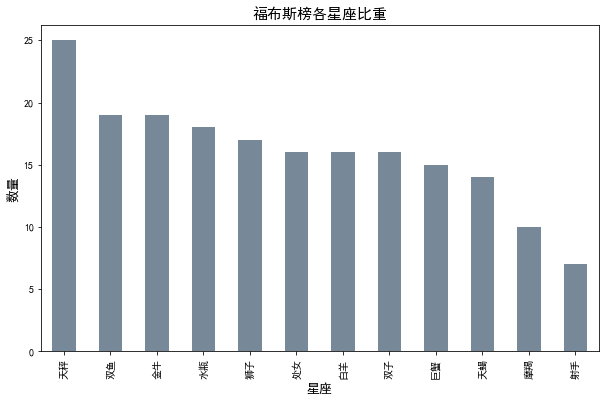

In [21]:
plt.rcParams['font.sans-serif']=['SimHei'] #在windows環境下解決matplotlib中文亂碼
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #在mac環境下解決matplotlib中文亂碼
fig=plt.figure(figsize=(10,6)) 
Q1['星座'].value_counts().plot(kind='bar',color='#778899')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('福布斯榜各星座比重',size=15)

### Q2 What is the relationship between the type of horoscope and the ranking of billionaires?

In [22]:
g1_a=Q1['星座'].head(48) #取12的整數倍進行分層
print(len(g1_a))
g1_a.value_counts()

48


天蝎    7
金牛    7
白羊    5
狮子    5
天秤    5
双子    4
双鱼    4
水瓶    4
处女    4
巨蟹    2
摩羯    1
Name: 星座, dtype: int64

In [23]:
g1avaluecounts=g1_a.value_counts()
dict1=dict(g1avaluecounts)
dict1['射手'] = '0' 
print(dict1)
arr = list(dict1.items())
g1_aa = pd.DataFrame(list(dict1.items()), columns=['星座', '数量'])

{'天蝎': 7, '金牛': 7, '白羊': 5, '狮子': 5, '天秤': 5, '双子': 4, '双鱼': 4, '水瓶': 4, '处女': 4, '巨蟹': 2, '摩羯': 1, '射手': '0'}


Text(0.5,1,'前四十八名内各星座比重')

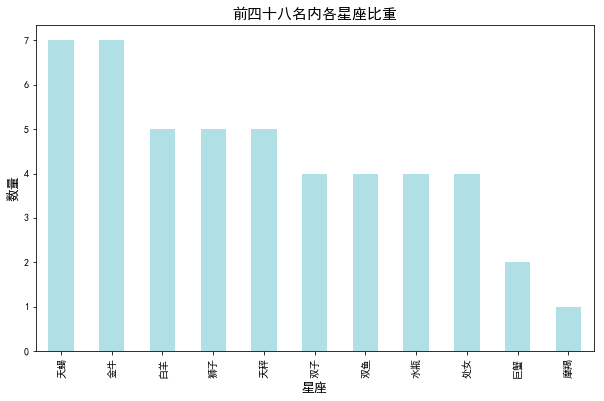

In [24]:
fig=plt.figure(figsize=(10,6)) 
g1_a.value_counts().plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前四十八名内各星座比重',size=15)

In [26]:
g1_b=Q1['星座'].head(96)
g1_b.value_counts()

金牛    13
天秤    11
白羊    10
双鱼     9
双子     9
天蝎     8
水瓶     8
狮子     8
巨蟹     7
处女     6
摩羯     4
射手     3
Name: 星座, dtype: int64

Text(0.5,1,'前九十六名内各星座比重')

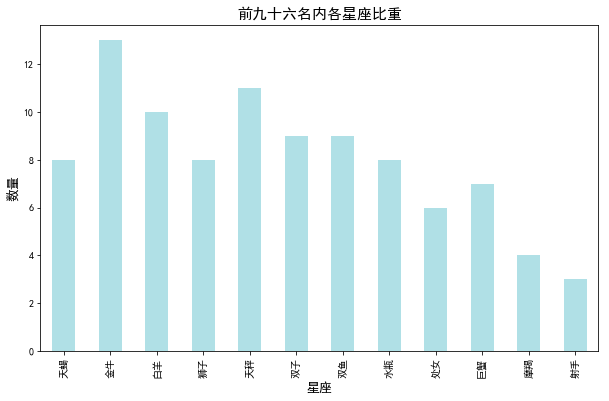

In [28]:
fig=plt.figure(figsize=(10,6)) 
g1_xzorder=g1_aa["星座"].tolist()
g1_b.value_counts().plot(kind='bar',color='#ffffff')
g1_b.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前九十六名内各星座比重',size=15)

In [29]:
g1_c=Q1['星座'].head(144) 
g1_c.value_counts()

双鱼    18
金牛    17
天秤    16
狮子    13
处女    12
双子    12
天蝎    12
白羊    11
水瓶    11
巨蟹    11
摩羯     7
射手     4
Name: 星座, dtype: int64

Text(0.5,1,'前一百四十四名内各星座比重')

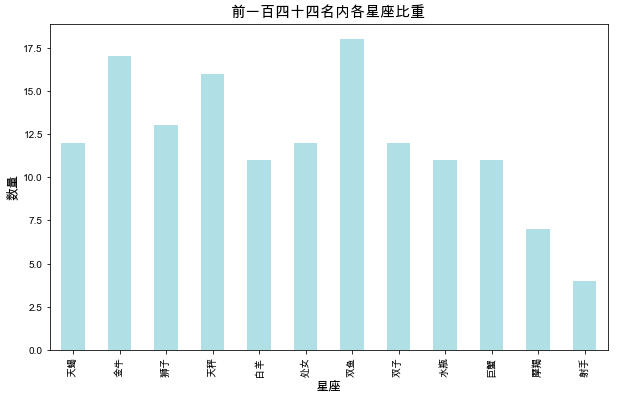

In [39]:
fig=plt.figure(figsize=(10,6)) 
g1_c.value_counts().plot(kind='bar',color='#ffffff')
g1_c.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前一百四十四名内各星座比重',size=15)

In [31]:
g1_d=Q1['星座'].head(192)
g1_d.value_counts()

天秤    25
双鱼    19
金牛    19
水瓶    18
狮子    17
处女    16
白羊    16
双子    16
巨蟹    15
天蝎    14
摩羯    10
射手     7
Name: 星座, dtype: int64

Text(0.5,1,'前一百九十二名内各星座比重')

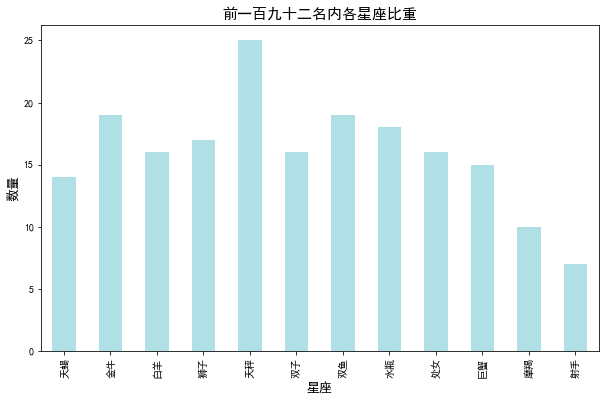

In [32]:
fig=plt.figure(figsize=(10,6)) 
g1_d.value_counts().plot(kind='bar',color='#ffffff')
g1_d.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前一百九十二名内各星座比重',size=15)

In [33]:
g1a=g1_a.value_counts()
a_ranking=dict(g1a)
print(a_ranking)
print(len(a_ranking))

{'天蝎': 7, '金牛': 7, '白羊': 5, '狮子': 5, '天秤': 5, '双子': 4, '双鱼': 4, '水瓶': 4, '处女': 4, '巨蟹': 2, '摩羯': 1}
11


In [34]:
a_ranking['射手'] = '0' #重新添加g1_a.value_counts()中被過濾掉的0次射手座
print(a_ranking)
print(len(a_ranking))

{'天蝎': 7, '金牛': 7, '白羊': 5, '狮子': 5, '天秤': 5, '双子': 4, '双鱼': 4, '水瓶': 4, '处女': 4, '巨蟹': 2, '摩羯': 1, '射手': '0'}
12


In [35]:
g1b=g1_b.value_counts()
b_ranking=dict(g1b)
print(b_ranking)
g1c=g1_c.value_counts()
c_ranking=dict(g1c)
print(c_ranking)
g1d=g1_d.value_counts()
d_ranking=dict(g1d)
print(d_ranking)

{'金牛': 13, '天秤': 11, '白羊': 10, '双鱼': 9, '双子': 9, '天蝎': 8, '水瓶': 8, '狮子': 8, '巨蟹': 7, '处女': 6, '摩羯': 4, '射手': 3}
{'双鱼': 18, '金牛': 17, '天秤': 16, '狮子': 13, '处女': 12, '双子': 12, '天蝎': 12, '白羊': 11, '水瓶': 11, '巨蟹': 11, '摩羯': 7, '射手': 4}
{'天秤': 25, '双鱼': 19, '金牛': 19, '水瓶': 18, '狮子': 17, '处女': 16, '白羊': 16, '双子': 16, '巨蟹': 15, '天蝎': 14, '摩羯': 10, '射手': 7}


In [36]:
from pandas import DataFrame
from pandas.plotting import parallel_coordinates

(9, 1)

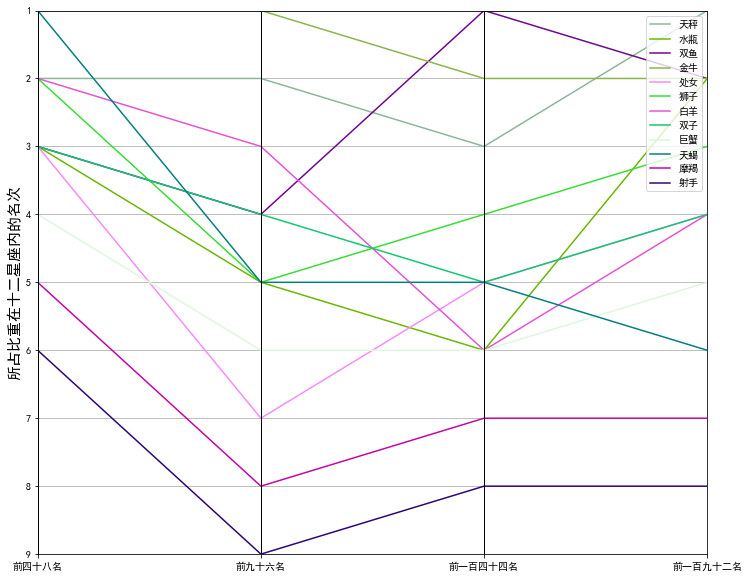

In [37]:
df_g1=DataFrame({'星座':['天秤','水瓶','双鱼','金牛','处女','狮子','白羊','双子','巨蟹','天蝎','摩羯','射手'],'前四十八名':[2,3,3,1,3,2,2,3,4,1,5,6],'前九十六名':[2,5,4,1,7,5,3,4,6,5,8,9],'前一百四十四名':[3,6,1,2,5,4,6,5,6,5,7,8],'前一百九十二名':[1,2,2,2,4,3,4,4,5,6,7,8]})
fig=plt.figure(figsize=(12,10)) 
plt.ylabel('所占比重在十二星座内的名次',size=15)
parallel_coordinates(df_g1,'星座')
plt.ylim((9, 1))

### Q3 Which horoscope is expected to have more wealth?

In [41]:
finaldataclear = pd.read_csv('pd_finaldataclear.csv')
valueclear=finaldataclear['财富值（亿美元）']
value1=DataFrame(valueclear)
value2=value1.reset_index(drop=True)
value_xz=pd.merge(xzlistdata, value2, left_index=True, right_index=True, how='outer')
grouped = value_xz['财富值（亿美元）'].groupby(value_xz['星座'])
sumvalue=DataFrame(grouped.sum())
sumvalue.to_csv('pd_sumvalue.csv')

In [42]:
sumvalue1 = pd.read_csv('pd_sumvalue.csv')
sumvalue2 = sumvalue1.sort_values(by="财富值（亿美元）", ascending=False)
sumvalue2

,星座,财富值（亿美元）
11,金牛,4145
4,天蝎,4007
3,天秤,3966
10,白羊,3607
1,双鱼,3512
9,狮子,3493
2,处女,3419
8,水瓶,3315
0,双子,2923
6,巨蟹,2363


In [43]:
import matplotlib.pyplot as plt
import squarify

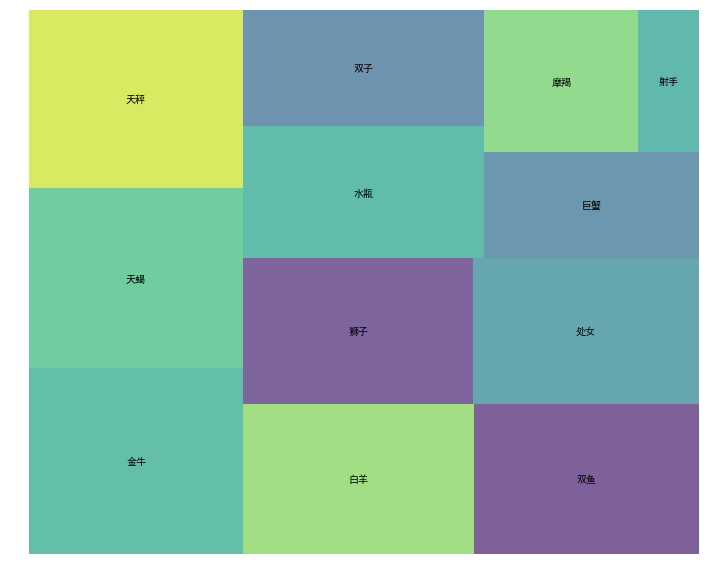

In [44]:
fig=plt.figure(figsize=(12,10))
squarify.plot(sizes=sumvalue2['财富值（亿美元）'], label=sumvalue2['星座'], alpha=.7 )
plt.axis('off')
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

<br>